In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score,accuracy_score
import pickle

C:\Users\dasab\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("creditcard.csv")

This dataset was obtained from: 
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud <br>

From the dataset description: <br>
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. <br>

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. <br>

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. <br>

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification. <br>

In [6]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

As expected, the dataset is highly imbalanced. <br>
There are a total of almost 285,000 instances.

### Exploratory Data Analysis

In [4]:
cols = df.columns.tolist()
cols.remove('Time')
cols.remove('Amount')
cols.remove('Class')

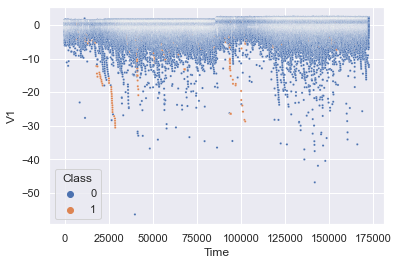

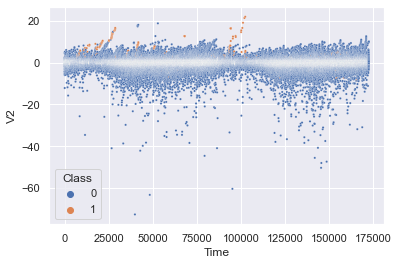

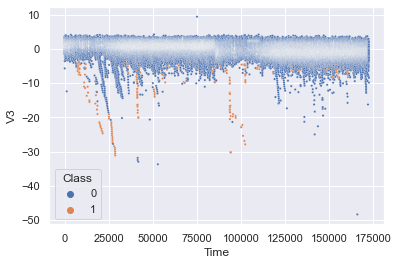

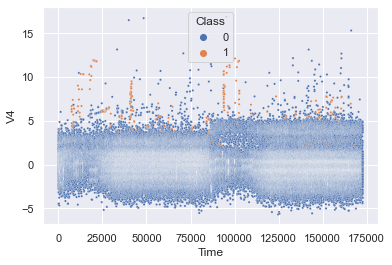

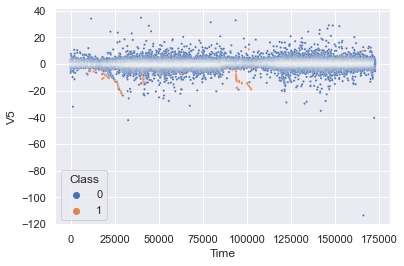

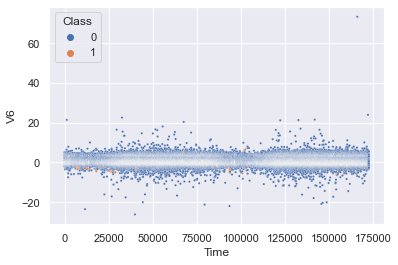

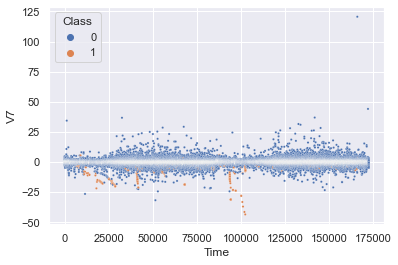

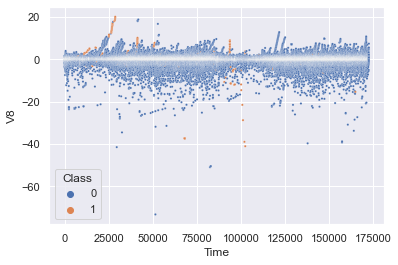

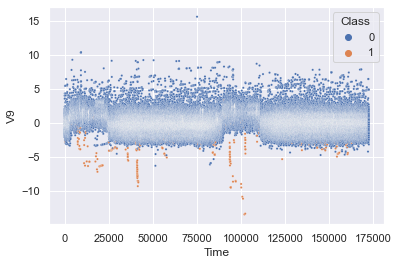

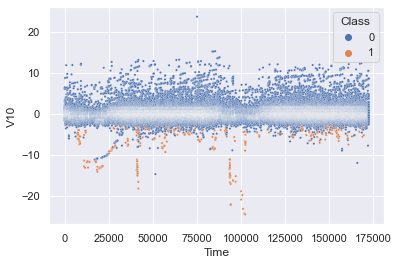

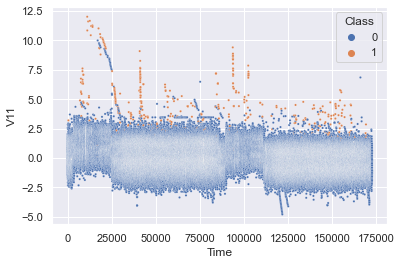

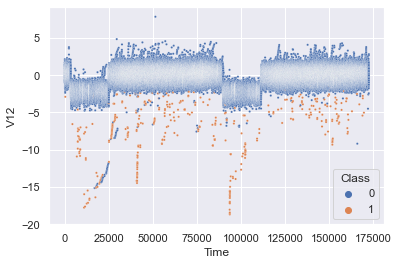

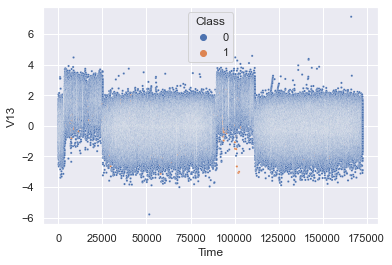

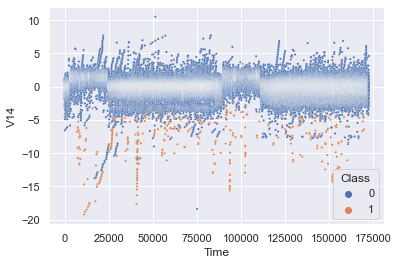

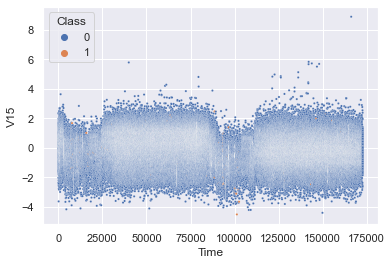

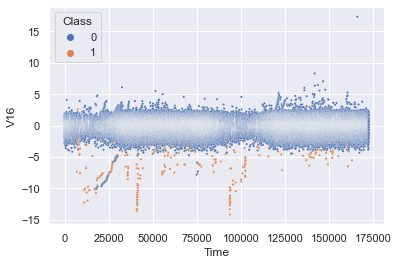

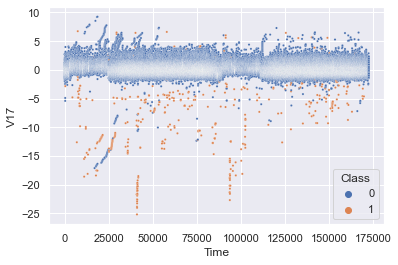

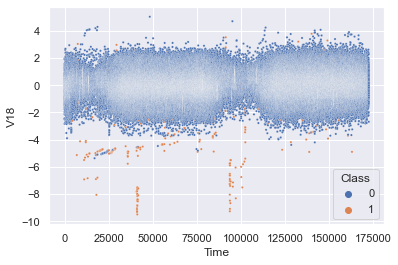

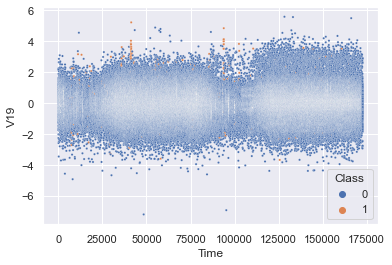

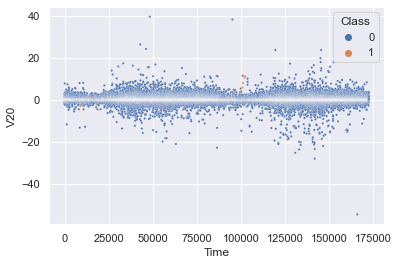

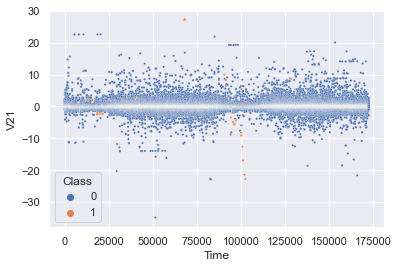

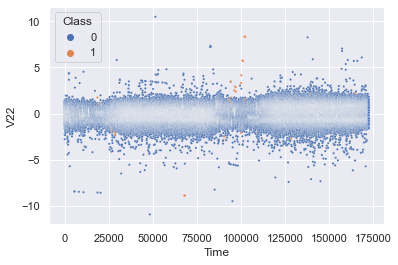

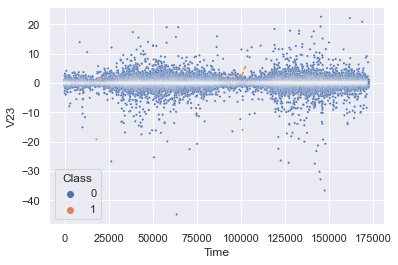

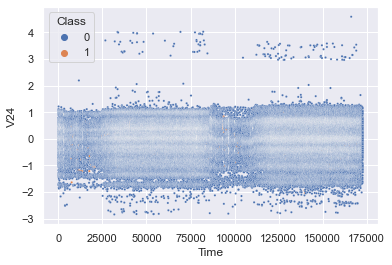

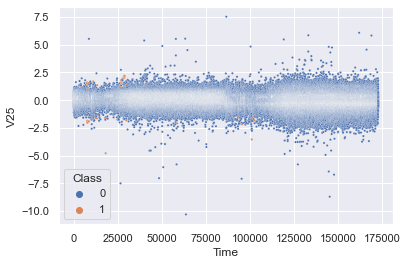

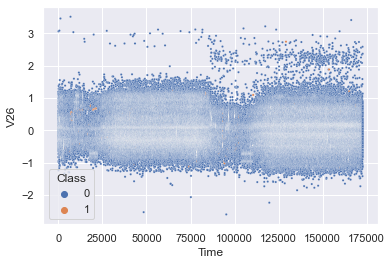

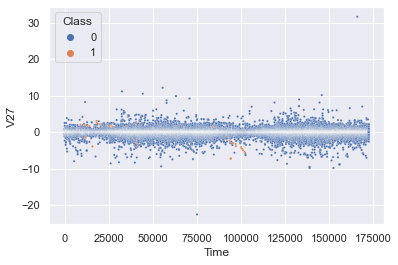

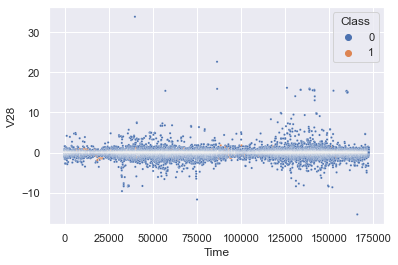

In [17]:
for i in cols:
    sns.scatterplot(data=df,x='Time',y=i,hue='Class',s=5)
    plt.show()

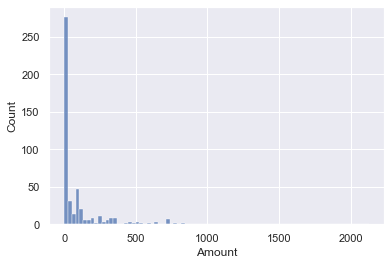

In [37]:
sns.histplot(df['Amount'].loc[df['Class']==1])
plt.show()

In [38]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Fraudulent transactions are limited to smaller transactions. naturally. <br>
For the non-fraudulent transactions, the Amount feature has a very long tail. <br>

Since there are too many features, I will randomly take 5 features and make a pairplot.

In [41]:
vs = np.random.choice(cols,size=5,replace='False').tolist()

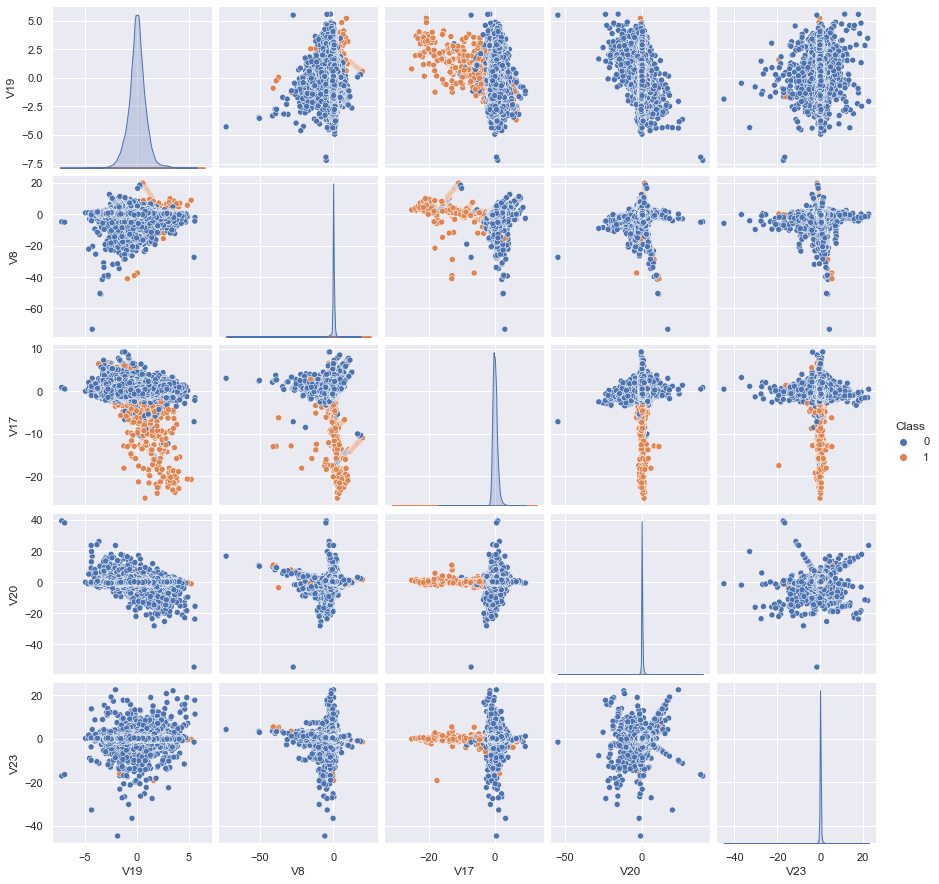

In [42]:
sns.pairplot(df[vs+['Class']],hue='Class')
plt.show()

This dataset is very well-behaved. I see very good class separation in a lot of features. I think my model will perform just fine. <br>

### Model Fitting

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis=1),df['Class'],test_size=0.2,random_state=2)

In [8]:
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(),
               CatBoostClassifier(verbose=False),XGBClassifier(),LGBMClassifier()]

scores = pd.DataFrame(columns=['classifier','test-recall','train-recall','test-accuracy','train-accuracy'])

for i in classifiers:
    i.fit(X_train, y_train)
    y_pred_test = i.predict(X_test)
    y_pred_train = i.predict(X_train)
    scores.loc[scores.shape[0]] = [i.__class__.__name__, recall_score(y_test,y_pred_test),recall_score(y_train,y_pred_train),
                                   accuracy_score(y_test,y_pred_test),accuracy_score(y_train,y_pred_train)]

C:\Users\dasab\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dasab\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:10:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [9]:
scores.sort_values(by='test-recall')

,classifier,test-recall,train-recall,test-accuracy,train-accuracy
4,LGBMClassifier,0.690476,0.678922,0.997226,0.998249
0,DecisionTreeClassifier,0.738095,1.000000,0.999122,1.000000
1,RandomForestClassifier,0.809524,1.000000,0.999631,1.000000
2,CatBoostClassifier,0.809524,0.995098,0.999649,0.999991
3,XGBClassifier,0.809524,1.000000,0.999631,1.000000


There is significant over-fitting, but recall-score is tolerable.
#### Resampling - undersampling the majority class

In [5]:
traindf = pd.concat([X_train,pd.DataFrame(y_train)],axis=1)

n0, n1 = traindf['Class'].value_counts() #number of instances in each class

class0 = traindf[traindf['Class']==0]
class1 = traindf[traindf['Class']==1]

In [6]:
print("Before Resampling")
print("Fraction of Class 0: {}".format(n0/(n0+n1))) 
print("Fraction of Class 1: {}".format(n1/(n0+n1)))

class0under = class0.sample(n1,replace=False)
underdf = pd.concat([class0under,class1],axis=0).sample(frac=1)

print("After Resampling")
print("Fraction of Class 0: {}".format(underdf['Class'].value_counts()[0]/underdf.shape[0]))
print("Fraction of Class 1: {}".format(underdf['Class'].value_counts()[1]/underdf.shape[0]))

Before Resampling
Fraction of Class 0: 0.9982093089600387
Fraction of Class 1: 0.0017906910399613772
After Resampling
Fraction of Class 0: 0.5
Fraction of Class 1: 0.5


In [7]:
X_train = underdf.drop('Class',axis=1)
y_train = underdf['Class']

In [8]:
classifiers_res = [DecisionTreeClassifier(), RandomForestClassifier(),
               CatBoostClassifier(verbose=False),XGBClassifier(),LGBMClassifier()]

scores_res = pd.DataFrame(columns=['classifier','test-recall','train-recall','test-accuracy','train-accuracy'])

for i in classifiers_res:
    i.fit(X_train, y_train)
    y_pred_test = i.predict(X_test)
    y_pred_train = i.predict(X_train)
    scores_res.loc[scores_res.shape[0]] = [i.__class__.__name__, recall_score(y_test,y_pred_test),recall_score(y_train,y_pred_train),
                                   accuracy_score(y_test,y_pred_test),accuracy_score(y_train,y_pred_train)]

C:\Users\dasab\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dasab\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[09:29:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [9]:
scores_res.sort_values(by='test-recall')

,classifier,test-recall,train-recall,test-accuracy,train-accuracy
1,RandomForestClassifier,0.880952,1.0,0.976581,1.0
4,LGBMClassifier,0.904762,1.0,0.969471,1.0
2,CatBoostClassifier,0.916667,1.0,0.981040,1.0
0,DecisionTreeClassifier,0.928571,1.0,0.915646,1.0
3,XGBClassifier,0.928571,1.0,0.968734,1.0


Improvement in recall, but over-fitting remains. I will keep CatBoostClassifier as my final model. <br>
Let's look at the performance on the whole dataset - since we dropped a lot of instances of the majority class.

In [10]:
X_all = df.drop('Class',axis=1)
y_all = df['Class']

In [18]:
scores_all = pd.DataFrame(columns=['classifier','Recall','Accuracy'])

for i in classifiers_res:
    y_pred_all = i.predict(X_all)
    scores_all.loc[scores_all.shape[0]] = [i.__class__.__name__,recall_score(y_all,y_pred_all),accuracy_score(y_all,y_pred_all)]

In [19]:
scores_all.sort_values(by='Recall')

,classifier,Recall,Accuracy
0,DecisionTreeClassifier,0.981707,0.908412
4,LGBMClassifier,0.981707,0.971360
1,RandomForestClassifier,0.983740,0.974067
2,CatBoostClassifier,0.983740,0.973579
3,XGBClassifier,0.983740,0.964264


Model is performing beyond expectations. Let's look more into detail into CatBoost model performance.

In [11]:
cat = classifiers_res[2]

In [12]:
y_pred = cat.predict(X_all)
y_pred_proba = cat.predict_proba(X_all)[:,1].reshape(-1,1)

y_pred_test = cat.predict(X_test)
y_pred_proba_test = cat.predict_proba(X_test)[:,1].reshape(-1,1)

y_pred_train = cat.predict(X_train)
y_pred_proba_train = cat.predict_proba(X_train)[:,1].reshape(-1,1)

In [13]:
print("Classification Reports")
print("Test Set")
print(classification_report(y_test,y_pred_test))

print("Train Set")
print(classification_report(y_train,y_pred_train))

print("Whole  dataset")
print(classification_report(y_all,y_pred))

Classification Reports
Test Set
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56878
           1       0.07      0.92      0.12        84

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Train Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       408

    accuracy                           1.00       816
   macro avg       1.00      1.00      1.00       816
weighted avg       1.00      1.00      1.00       816

Whole  dataset
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.09      0.99      0.16       492

    accuracy                           0.98    284807
   macro avg       0.54      0.98      0.57    284807
weighted avg     

In [14]:
print("ROC-AUC Scores")
print("\nTest Set")
print(roc_auc_score(y_test,y_pred_proba_test))

print("\nTrain Set")
print(roc_auc_score(y_train,y_pred_proba_train))

print("\nWhole  dataset")
print(roc_auc_score(y_pred,y_pred_proba))

ROC-AUC Scores

Test Set
0.9848830579737081

Train Set
1.0

Whole  dataset
1.0


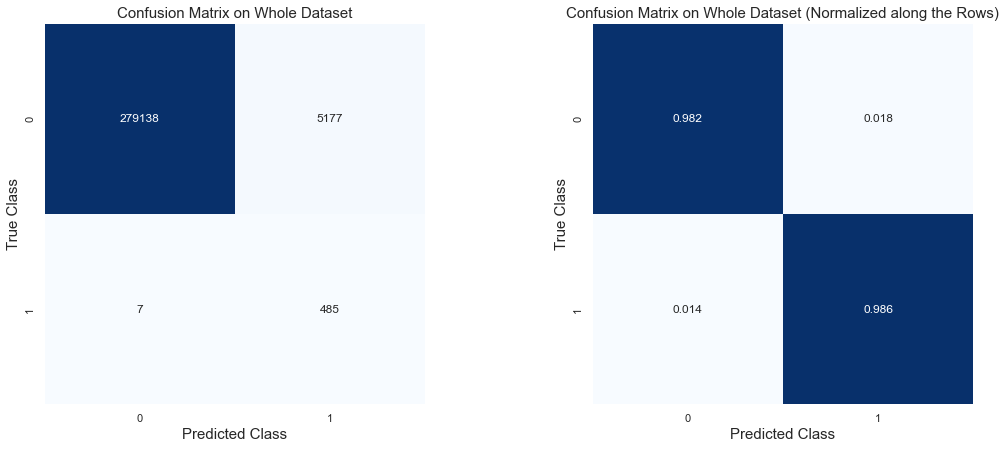

In [35]:
fig,ax = plt.subplots(1,2,figsize=(18,7))
sns.heatmap(confusion_matrix(y_all,y_pred),annot=True,cbar=False,square=True,cmap='Blues',fmt='g',ax=ax[0])
ax[0].set_title("Confusion Matrix on Whole Dataset",fontsize=15)
ax[0].set_xlabel("Predicted Class",fontsize=15)
ax[0].set_ylabel("True Class",fontsize=15)

sns.heatmap(confusion_matrix(y_all,y_pred,normalize='true'),annot=True,cbar=False,square=True,cmap='Blues',fmt='.3f',ax=ax[1])
ax[1].set_title("Confusion Matrix on Whole Dataset (Normalized along the Rows)",fontsize=15)
ax[1].set_xlabel("Predicted Class",fontsize=15)
ax[1].set_ylabel("True Class",fontsize=15)
plt.show()

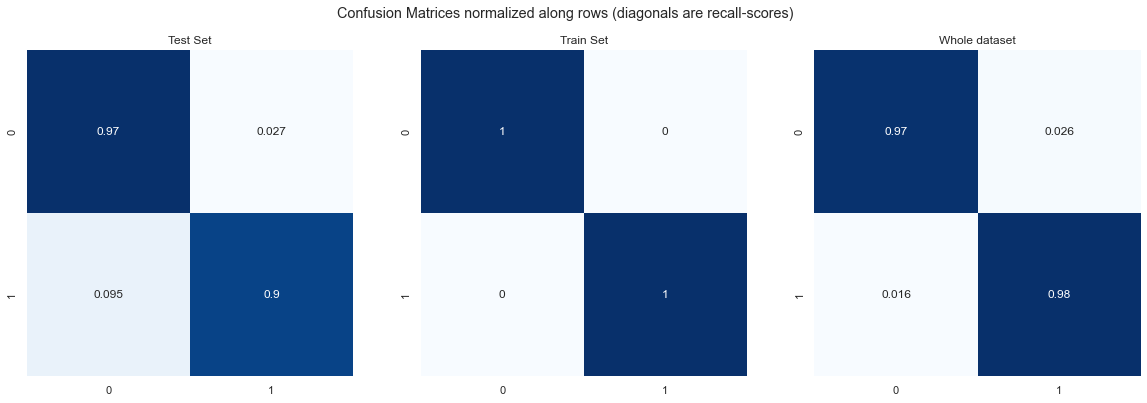

In [34]:
fig,ax = plt.subplots(1,3,figsize=(20,6))
plt.suptitle("Confusion Matrices normalized along rows (diagonals are recall-scores)")
sns.heatmap(confusion_matrix(y_test,y_pred_test,normalize='true'),annot=True,cbar=False,square=True,cmap='Blues',ax=ax[0])
ax[0].set_title("Test Set")

sns.heatmap(confusion_matrix(y_train,y_pred_train,normalize='true'),annot=True,cbar=False,square=True,cmap='Blues',ax=ax[1])
ax[1].set_title("Train Set")

sns.heatmap(confusion_matrix(y_all,y_pred,normalize='true'),annot=True,cbar=False,square=True,cmap='Blues',ax=ax[2])
ax[2].set_title("Whole dataset")
plt.show()

Model-performance is quite phenomenal. Especially on the whole dataset.

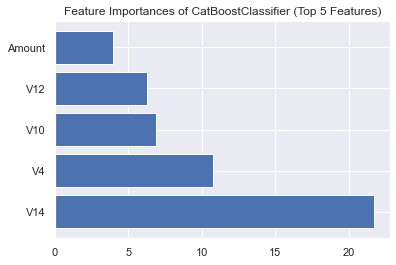

In [35]:
feat_imp_sorted_str = np.flip(np.sort(cat.feature_importances_))[:5]
feat_imp_sorted_args_str = np.flip(np.argsort(cat.feature_importances_))[:5]
feat_names_sorted_str = X_train.columns[feat_imp_sorted_args_str]

plt.barh(feat_names_sorted_str,feat_imp_sorted_str)
plt.title("Feature Importances of CatBoostClassifier (Top 5 Features)")
plt.show()

In [37]:
pickle.dump(cat,open('catboost_ccfraud.pkl','wb'))